In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns 
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle('Datos_data_challenge.pkl')
df

{'flow': array([1.72378057e+00, 9.60881602e-01, 1.00000000e-03, ...,
        3.55681843e+00, 3.40213266e+00, 1.81279569e+00]),
 'obs_tas': array([[-10.60000038,  -9.69999981,  -6.69999981, ...,  -8.10000038,
          -6.5       ,  -5.4000001 ],
        [-20.5       , -19.10000038, -12.        , ..., -15.5       ,
         -11.80000019,  -9.10000038],
        [-23.60000038, -22.5       , -15.10000038, ..., -19.39999962,
         -14.60000038, -12.19999981],
        ...,
        [-11.89999962, -11.39999962,  -8.39999962, ...,  -9.30000019,
          -7.19999981,  -6.30000019],
        [ -7.        ,  -6.5       ,  -3.4000001 , ...,  -5.        ,
          -3.79999995,  -3.        ],
        [ -2.4000001 ,  -2.0999999 ,   1.29999995, ...,  -0.89999998,
           0.5       ,   1.10000002]]),
 'flow_dates': 1958-01-04   1958-01-04
 1958-01-05   1958-01-05
 1958-01-06   1958-01-06
 1958-01-07   1958-01-07
 1958-01-08   1958-01-08
                 ...    
 2016-12-22   2016-12-22
 2016-12-2

In [3]:
lons=df['obs_lon_lat'][0]
lats=df['obs_lon_lat'][1]

In [4]:
!pip install basemap

  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37268 sha256=6b5f39f2a587870ca0394a4c8d4fb540f39272a8031e3d084d758c81aae9746f
  Stored in directory: c:\users\iker\appdata\local\pip\cache\wheels\1f\1b\b5\54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [5]:
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sns.set(style="white", color_codes=True)
%matplotlib inline
%matplotlib inline

In [8]:
target=pd.DataFrame.from_dict(df['flow'])
target.columns=['Flow']
target.shape

(21542, 1)

In [9]:
target_dates=pd.DataFrame.from_dict(df['flow_dates'])
target_dates.columns=['Flow_Dates']
target_dates.index=range(len(target_dates))
target_dates.shape

(21542, 1)

In [10]:
target['Dates']=target_dates['Flow_Dates']
target=target.set_index('Dates')
target.head()

Flow
Dates               
1958-01-04  1.723781
1958-01-05  0.960882
1958-01-06  0.001000
1958-01-07  0.001000
1958-01-08  0.316796

In [11]:
pred_temp=pd.DataFrame.from_dict(df['obs_tas'])
pred_temp.columns=['Temp1','Temp2','Temp3','Temp4','Temp5','Temp6','Temp7','Temp8','Temp9']
pred_temp.shape

(21546, 9)

In [12]:
pred_prec=pd.DataFrame.from_dict(df['obs_pr'])
pred_prec.columns=['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']
pred_prec.shape

(21546, 9)

In [13]:
pred_dates=pd.DataFrame.from_dict(df['obs_dates'])
pred_dates.columns=['Observation_Dates']
pred_dates.index=range(len(pred_dates))
pred_dates.shape

(21546, 1)

In [14]:
pred=pred_temp
pred[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']]=pred_prec[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']]
pred['Dates']=pred_dates['Observation_Dates']
pred=pred.set_index('Dates')
pred.head()

Temp1  Temp2  Temp3      Temp4      Temp5      Temp6  Temp7  \
Dates                                                                         
1957-01-01 -10.600000   -9.7   -6.7  -8.800000  -8.900000  -7.500000   -8.1   
1957-01-02 -20.500000  -19.1  -12.0 -17.700001 -17.700001 -13.100000  -15.5   
1957-01-03 -23.600000  -22.5  -15.1 -21.400000 -21.400000 -16.299999  -19.4   
1957-01-04 -16.200001  -16.0  -14.1 -15.600000 -15.400000 -14.500000  -15.0   
1957-01-05  -7.900000   -7.8   -9.5  -7.600000  -7.500000  -8.000000   -7.4   

            Temp8  Temp9  Prec1  Prec2  Prec3  Prec4  Prec5  Prec6  Prec7  \
Dates                                                                       
1957-01-01   -6.5   -5.4    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1957-01-02  -11.8   -9.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1957-01-03  -14.6  -12.2    0.1    0.0    0.3    0.1    0.3    0.3    0.4   
1957-01-04  -13.8  -11.9    1.0    0.0    1.0    1.1    0.9    0.7    0.8   
1957-01-05   -8.6   -8.2    9.3    8.6    8.0    8.9    8.7   10.2    9.3   

            Prec8  Prec9  
Dates                     
1957-01-01    0.1    0.1  
1957-01-02    0.2    0.1  
1957-01-03    0.3    0.5  
1957-01-04    0.4    0.6  
1957-01-05   10.1    9.7

In [15]:
df_full=pd.concat([target,pred],axis=1)
df_full.head()

Flow      Temp1  Temp2  Temp3      Temp4      Temp5      Temp6  \
Dates                                                                        
1957-01-01   NaN -10.600000   -9.7   -6.7  -8.800000  -8.900000  -7.500000   
1957-01-02   NaN -20.500000  -19.1  -12.0 -17.700001 -17.700001 -13.100000   
1957-01-03   NaN -23.600000  -22.5  -15.1 -21.400000 -21.400000 -16.299999   
1957-01-04   NaN -16.200001  -16.0  -14.1 -15.600000 -15.400000 -14.500000   
1957-01-05   NaN  -7.900000   -7.8   -9.5  -7.600000  -7.500000  -8.000000   

            Temp7  Temp8  Temp9  Prec1  Prec2  Prec3  Prec4  Prec5  Prec6  \
Dates                                                                       
1957-01-01   -8.1   -6.5   -5.4    0.0    0.0    0.0    0.0    0.0    0.0   
1957-01-02  -15.5  -11.8   -9.1    0.0    0.0    0.0    0.0    0.0    0.0   
1957-01-03  -19.4  -14.6  -12.2    0.1    0.0    0.3    0.1    0.3    0.3   
1957-01-04  -15.0  -13.8  -11.9    1.0    0.0    1.0    1.1    0.9    0.7   
1957-01-05   -7.4   -8.6   -8.2    9.3    8.6    8.0    8.9    8.7   10.2   

            Prec7  Prec8  Prec9  
Dates                            
1957-01-01    0.0    0.1    0.1  
1957-01-02    0.0    0.2    0.1  
1957-01-03    0.4    0.3    0.5  
1957-01-04    0.8    0.4    0.6  
1957-01-05    9.3   10.1    9.7

In [16]:
print('Shape of dataframe:',df_full.shape)
df_full.isna().sum()

Shape of dataframe: (21910, 19)


Flow     368
Temp1    364
Temp2    364
Temp3    364
Temp4    364
Temp5    364
Temp6    364
Temp7    364
Temp8    364
Temp9    364
Prec1    364
Prec2    364
Prec3    364
Prec4    364
Prec5    364
Prec6    364
Prec7    364
Prec8    364
Prec9    364
dtype: int64

In [17]:
df_clean=df_full.dropna()
df_clean.shape

(21178, 19)

In [18]:
X_clean=df_clean.loc[:,df_clean.columns!='Flow']
Y_clean=df_clean.loc[:,df_clean.columns=='Flow']

In [19]:
df_clean.describe()

Flow         Temp1         Temp2         Temp3         Temp4  \
count  21178.000000  21178.000000  21178.000000  21178.000000  21178.000000   
mean       6.914146     -0.047006      0.714643      2.979516      1.489362   
std        9.665353      8.261391      8.396938      9.050337      8.571648   
min        0.000031    -33.799999    -32.599998    -33.299999    -33.700001   
25%        1.156123     -5.800000     -5.200000     -3.100000     -4.400000   
50%        3.151342      0.200000      0.900000      3.400000      1.800000   
75%        8.606681      6.600000      7.600000     10.600000      8.500000   
max       85.397653     20.299999     21.200001     23.400000     21.700001   

              Temp5         Temp6         Temp7         Temp8         Temp9  \
count  21178.000000  21178.000000  21178.000000  21178.000000  21178.000000   
mean       1.274884      2.313594      1.890589      2.839834      3.527821   
std        8.467370      8.613825      8.575300      8.797301      8.959525   
min      -32.799999    -32.200001    -33.200001    -32.599998    -30.799999   
25%       -4.600000     -3.700000     -4.000000     -3.200000     -2.600000   
50%        1.500000      2.500000      2.200000      3.100000      3.700000   
75%        8.200000      9.500000      9.000000     10.200000     11.100000   
max       21.700001     22.700001     21.799999     23.299999     24.000000   

              Prec1         Prec2         Prec3         Prec4         Prec5  \
count  21178.000000  21178.000000  21178.000000  21178.000000  21178.000000   
mean       1.991529      2.007583      2.076490      2.213070      2.265171   
std        4.025939      4.347522      4.496716      4.560043      4.756833   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.500000      2.200000      2.200000      2.600000      2.600000   
max       61.500000     60.700001     66.800003     64.000000     62.400002   

              Prec6         Prec7         Prec8         Prec9  
count  21178.000000  21178.000000  21178.000000  21178.000000  
mean       2.214652      2.305860      2.385376      2.255959  
std        4.908967      4.807279      5.424111      5.184413  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        2.200000      2.600000      2.200000      2.000000  
max       61.299999     64.500000     67.699997     73.699997

Verify correlation among variables

In [20]:
df_clean.corr()

Flow     Temp1     Temp2     Temp3     Temp4     Temp5     Temp6  \
Flow   1.000000  0.321395  0.328661  0.347238  0.331841  0.331223  0.340982   
Temp1  0.321395  1.000000  0.998956  0.977156  0.996456  0.997461  0.990467   
Temp2  0.328661  0.998956  1.000000  0.982988  0.998648  0.999480  0.994931   
Temp3  0.347238  0.977156  0.982988  1.000000  0.988485  0.986217  0.993135   
Temp4  0.331841  0.996456  0.998648  0.988485  1.000000  0.999552  0.996896   
Temp5  0.331223  0.997461  0.999480  0.986217  0.999552  1.000000  0.996800   
Temp6  0.340982  0.990467  0.994931  0.993135  0.996896  0.996800  1.000000   
Temp7  0.334333  0.994349  0.997284  0.991132  0.999492  0.998846  0.998118   
Temp8  0.346066  0.982109  0.987611  0.998233  0.991544  0.990508  0.996885   
Temp9  0.353181  0.971150  0.977994  0.996440  0.982389  0.981441  0.991050   
Prec1  0.214393  0.116400  0.115857  0.132477  0.119051  0.116358  0.119597   
Prec2  0.215766  0.110172  0.109712  0.125441  0.112649  0.110146  0.113164   
Prec3  0.222361  0.109049  0.108717  0.124473  0.111583  0.109140  0.112489   
Prec4  0.223283  0.114553  0.114058  0.130504  0.117214  0.114523  0.117749   
Prec5  0.218239  0.107296  0.106960  0.123710  0.110174  0.107481  0.110771   
Prec6  0.208095  0.090989  0.090575  0.106679  0.093597  0.091055  0.093963   
Prec7  0.218854  0.104836  0.104553  0.121591  0.107691  0.105057  0.108584   
Prec8  0.209890  0.092479  0.092335  0.109213  0.095358  0.092816  0.096431   
Prec9  0.200689  0.087871  0.087635  0.103655  0.090506  0.088088  0.091323   

          Temp7     Temp8     Temp9     Prec1     Prec2     Prec3     Prec4  \
Flow   0.334333  0.346066  0.353181  0.214393  0.215766  0.222361  0.223283   
Temp1  0.994349  0.982109  0.971150  0.116400  0.110172  0.109049  0.114553   
Temp2  0.997284  0.987611  0.977994  0.115857  0.109712  0.108717  0.114058   
Temp3  0.991132  0.998233  0.996440  0.132477  0.125441  0.124473  0.130504   
Temp4  0.999492  0.991544  0.982389  0.119051  0.112649  0.111583  0.117214   
Temp5  0.998846  0.990508  0.981441  0.116358  0.110146  0.109140  0.114523   
Temp6  0.998118  0.996885  0.991050  0.119597  0.113164  0.112489  0.117749   
Temp7  1.000000  0.994130  0.985909  0.119951  0.113462  0.112269  0.118000   
Temp8  0.994130  1.000000  0.997029  0.127347  0.120402  0.119536  0.125286   
Temp9  0.985909  0.997029  1.000000  0.134170  0.126923  0.126328  0.132141   
Prec1  0.119951  0.127347  0.134170  1.000000  0.959704  0.940866  0.976604   
Prec2  0.113462  0.120402  0.126923  0.959704  1.000000  0.909370  0.952563   
Prec3  0.112269  0.119536  0.126328  0.940866  0.909370  1.000000  0.957582   
Prec4  0.118000  0.125286  0.132141  0.976604  0.952563  0.957582  1.000000   
Prec5  0.110977  0.118328  0.125152  0.957486  0.967869  0.923725  0.974517   
Prec6  0.094312  0.101300  0.107952  0.914734  0.942729  0.886090  0.918065   
Prec7  0.108508  0.116224  0.123297  0.941314  0.928928  0.945633  0.967855   
Prec8  0.096177  0.103903  0.110678  0.894963  0.903756  0.875760  0.907881   
Prec9  0.091289  0.098589  0.105094  0.863183  0.876507  0.833352  0.861910   

          Prec5     Prec6     Prec7     Prec8     Prec9  
Flow   0.218239  0.208095  0.218854  0.209890  0.200689  
Temp1  0.107296  0.090989  0.104836  0.092479  0.087871  
Temp2  0.106960  0.090575  0.104553  0.092335  0.087635  
Temp3  0.123710  0.106679  0.121591  0.109213  0.103655  
Temp4  0.110174  0.093597  0.107691  0.095358  0.090506  
Temp5  0.107481  0.091055  0.105057  0.092816  0.088088  
Temp6  0.110771  0.093963  0.108584  0.096431  0.091323  
Temp7  0.110977  0.094312  0.108508  0.096177  0.091289  
Temp8  0.118328  0.101300  0.116224  0.103903  0.098589  
Temp9  0.125152  0.107952  0.123297  0.110678  0.105094  
Prec1  0.957486  0.914734  0.941314  0.894963  0.863183  
Prec2  0.967869  0.942729  0.928928  0.903756  0.876507  
Prec3  0.923725  0.886090  0.945633  0.875760  0.833352  
Prec4  0.974517  0.918065  0.967855  

<AxesSubplot:>

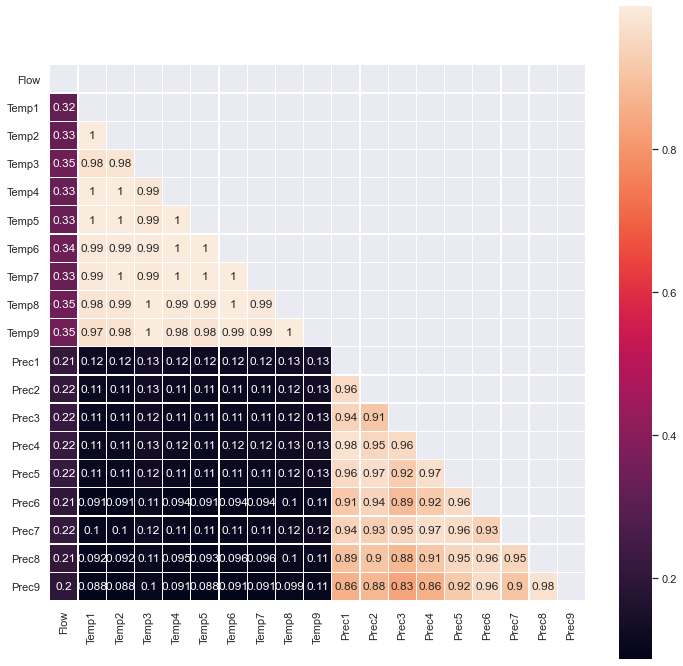

In [21]:
mask = np.zeros_like(df_clean.corr())
mask[np.triu_indices_from(mask)] = True
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(df_clean.corr(),annot=True, linewidths=.3, cmap="rocket", square=True, mask=mask)

# Dimensionality Reduction

# PCA

In [22]:
from sklearn.decomposition import PCA

pca_18=PCA(n_components=18)
pca_18.fit(X_clean)
X_pca_18=pca_18.transform(X_clean)
np.cumsum(pca_18.explained_variance_ratio_)*100

array([ 76.65468616,  97.9835098 ,  98.78113174,  99.2646139 ,
        99.5270932 ,  99.66336551,  99.75467954,  99.81564045,
        99.86623817,  99.90431224,  99.93370473,  99.96282645,
        99.98021793,  99.98981497,  99.99537562,  99.99859152,
        99.99947057, 100.        ])

Text(0, 0.5, 'Explained variance')

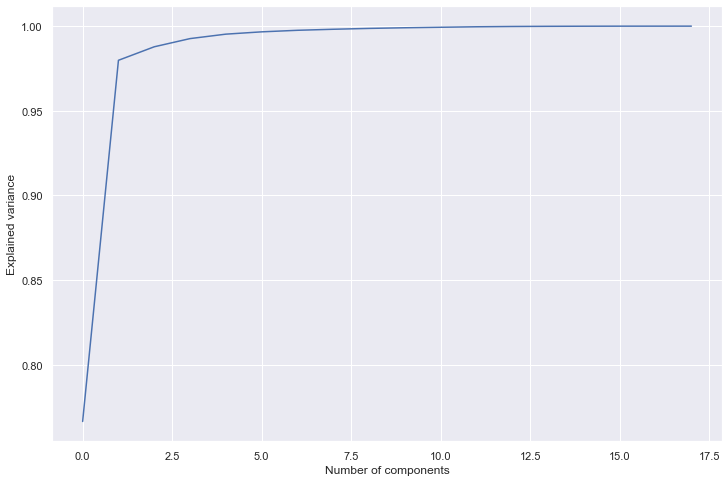

In [23]:
plt.figure(figsize=(12,8)) 
plt.plot(np.cumsum(pca_18.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [24]:
pca_2=PCA(n_components=2)
pca_2.fit(X_clean)
X_pca_2=pca_2.transform(X_clean)

In [25]:
df_pca_2=pd.DataFrame(X_pca_2,columns=['PC1','PC2'])
df_pca_2=df_pca_2.set_index(df_clean.index)
df_pca_2.head()

PC1        PC2
Dates                           
1958-01-04  44.097325  -2.952575
1958-01-05  28.713932   3.565914
1958-01-06  27.130745  33.936281
1958-01-07  34.652803  16.755645
1958-01-08  57.450841   8.503166

In [26]:
df_pca_2.shape

(21178, 2)

# Daily Mean

In [27]:
X_mean=pd.DataFrame(columns=['TempMean','PrecMean'])
X_mean['TempMean']=X_clean[['Temp1','Temp2','Temp3','Temp4','Temp5','Temp6','Temp7','Temp8','Temp9']].mean(axis=1)
X_mean['PrecMean']=X_clean[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']].mean(axis=1)
X_mean.tail()

TempMean  PrecMean
Dates                          
2015-12-27  -9.944444  0.555556
2015-12-28 -10.288889  4.888889
2015-12-29  -9.411111  1.277778
2015-12-30  -5.055556  3.444444
2015-12-31  -0.733333  8.322222

# Working with different time periods

P1: 1966-1975

In [29]:
Y_P1=Y_clean['1966-01-01':'1975-12-31']
X_pca_2_P1=df_pca_2['1966-01-01':'1975-12-31']
X_mean_P1=X_mean['1966-01-01':'1975-12-31']

df_P1=Y_P1
df_P1=df_P1.merge(X_pca_2_P1,left_index=True,right_index=True)
df_P1=df_P1.merge(X_mean_P1,left_index=True,right_index=True)
df_P1

Flow        PC1        PC2   TempMean  PrecMean
Dates                                                          
1966-01-01  0.957278  65.112734  -1.175313 -19.700000  0.000000
1966-01-02  0.292607  57.950971  19.088847 -17.877778  6.933333
1966-01-03  0.887541  45.070004   2.434590 -13.155555  1.722222
1966-01-04  0.243283  57.316372  -0.632420 -17.122222  0.355556
1966-01-05  0.001000  55.048142  -2.108953 -16.277778  0.000000
...              ...        ...        ...        ...       ...
1975-12-27  2.591555  -3.892819  -6.963980   3.388889  0.000000
1975-12-28  1.057908 -10.072424  -1.140430   5.244444  2.188889
1975-12-29  1.790253   2.448522  -6.191955   1.233333  0.066667
1975-12-30  2.392940   9.724658  -5.778004  -1.188889  0.000000
1975-12-31  0.094128   1.477260   1.516022   1.322222  2.833333

[3652 rows x 5 columns]

In [83]:
X_mean_P1

TempMean  PrecMean
Dates                          
1966-01-01 -19.700000  0.000000
1966-01-02 -17.877778  6.933333
1966-01-03 -13.155555  1.722222
1966-01-04 -17.122222  0.355556
1966-01-05 -16.277778  0.000000
...               ...       ...
1975-12-27   3.388889  0.000000
1975-12-28   5.244444  2.188889
1975-12-29   1.233333  0.066667
1975-12-30  -1.188889  0.000000
1975-12-31   1.322222  2.833333

[3652 rows x 2 columns]

In [30]:
df_P1.corr()

Flow       PC1       PC2  TempMean  PrecMean
Flow      1.000000 -0.316440  0.091744  0.311551  0.147203
PC1      -0.316440  1.000000  0.059278 -0.999226 -0.118061
PC2       0.091744  0.059278  1.000000 -0.098455  0.984121
TempMean  0.311551 -0.999226 -0.098455  1.000000  0.078953
PrecMean  0.147203 -0.118061  0.984121  0.078953  1.000000

<AxesSubplot:>

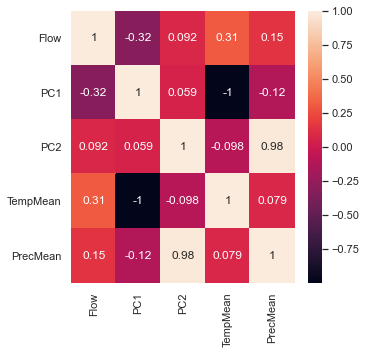

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(df_P1.corr(),annot=True,cmap='rocket')

In [33]:
df_P1_week=pd.DataFrame()
flow_week=[]
temp_week=[]
prec_week=[]
PC1_week=[]
PC2_week=[]

for i in range(0,len(df_P1),7):
    trashvar_1=0
    trashvar_2=0
    trashvar_3=0
    trashvar_4=0
    trashvar_5=0
    if (i+6)<len(df_P1):
        for j in range(7):
            trashvar_1+=df_P1['Flow'][i+j]
            trashvar_2+=df_P1['TempMean'][i+j]
            trashvar_3+=df_P1['PrecMean'][i+j]
            trashvar_4+=df_P1['PC1'][i+j]
            trashvar_5+=df_P1['PC2'][i+j]
        flow_week.append(trashvar_1/7)
        temp_week.append(trashvar_2/7)
        prec_week.append(trashvar_3/7)
        PC1_week.append(trashvar_4/7)
        PC2_week.append(trashvar_5/7)
    else:
        for j in range(len(df_P1)-i):
            trashvar_1+=df_P1['Flow'][i+j]
            trashvar_2+=df_P1['TempMean'][i+j]
            trashvar_3+=df_P1['PrecMean'][i+j]
            trashvar_4+=df_P1['PC1'][i+j]
            trashvar_5+=df_P1['PC2'][i+j]
        flow_week.append(trashvar_1/(len(df_P1)-i))
        temp_week.append(trashvar_2/(len(df_P1)-i))
        prec_week.append(trashvar_3/(len(df_P1)-i))
        PC1_week.append(trashvar_4/(len(df_P1)-i))
        PC2_week.append(trashvar_4/(len(df_P1)-i))
        

df_P1_week['FlowWeekMean']=flow_week
df_P1_week['TempWeekMean']=temp_week
df_P1_week['PrecWeekMean']=prec_week
df_P1_week['PC1WeekMean']=PC1_week
df_P1_week['PC2WeekMean']=PC2_week

df_P1_week.tail()

FlowWeekMean  TempWeekMean  PrecWeekMean  PC1WeekMean  PC2WeekMean
517      2.938204     -5.696825      2.825397    22.510245     3.947397
518      2.033682     -2.101587      0.200000    12.421578    -5.034074
519      1.763365     -4.495238      0.003175    19.677895    -4.974609
520      2.062051     -1.507936      0.126984    10.676060    -5.360493
521      1.585357      2.000000      1.017778    -0.062961    -0.062961

In [34]:
df_P1_month=pd.DataFrame()
for i in range(len(df_P1.index.year.unique())):
    for j in range(len(df_P1.index.month.unique())):
        trashvar_1=pd.DataFrame(df_P1.loc[df_P1.index.year==df_P1.index.year.unique()[i],['Flow','TempMean','PrecMean','PC1','PC2']])
        trashvar_1=trashvar_1.loc[trashvar_1.index.month==trashvar_1.index.month.unique()[j],:].mean()
        df_P1_month=df_P1_month.append(trashvar_1,ignore_index=True)

df_P1_month.columns=['FlowMonthMean','PrecMonthMean','TempMonthMean','PC1MonthMean','PC2MonthMean']
df_P1_month.tail()

FlowMonthMean  PrecMonthMean  TempMonthMean  PC1MonthMean  PC2MonthMean
115       0.643069     -37.172110      -4.683508      1.659857     14.364875
116       1.875402     -16.650640      -0.680646      2.425926      7.436296
117       5.074025      -2.386701       0.154446      2.304301      2.682796
118       2.329412      10.474382       0.748639      2.152593     -1.602593
119       2.058116      12.826790      -3.194514      0.787455     -2.281004

In [ ]:
#df_P01.to_csv('P01.csv')

# Model Training

## 1. K-Means Clustering


1.1 K-Means Clustering PCA

In [35]:
from sklearn.cluster import KMeans

Sum_of_squared_distancesP = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_P1[['PC1','PC2']])
    Sum_of_squared_distancesP.append(km.inertia_)

Sum_of_squared_distancesA = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_P1[['TempMean','PrecMean']])
    Sum_of_squared_distancesA.append(km.inertia_)

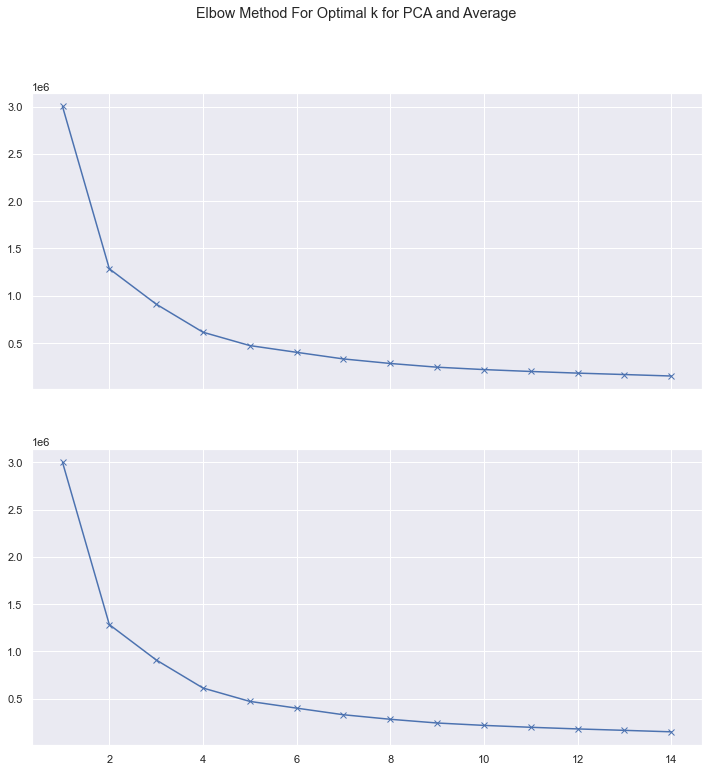

In [36]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Elbow Method For Optimal k for PCA and Average')
ax1.plot(K, Sum_of_squared_distancesP, 'bx-')
ax2.plot(K, Sum_of_squared_distancesP, 'bx-')

In [37]:
k=4
kmeans = KMeans(n_clusters=k).fit(df_P1[['PC1','PC2']])

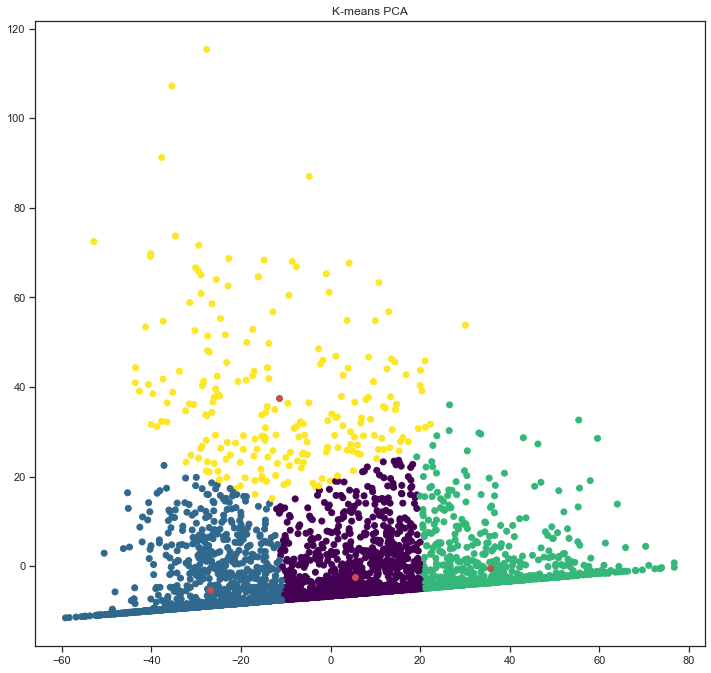

In [38]:
sns.set_style("ticks")
colors=["#FFD93D","#6BCB77","#4D96FF","#FF6B6B"]
plt.scatter(df_P1['PC1'],df_P1['PC2'],c = kmeans.labels_,cmap='viridis')
centers = kmeans.cluster_centers_
plt.title("K-means PCA")
plt.scatter(centers[:,0],centers[:,1],marker = 'o', c = 'r',cmap='viridis')
plt.axis('scaled')
plt.show()

1.2 K-Means Clustering Daily Mean

In [39]:
from sklearn.cluster import KMeans
k=4
kmeans = KMeans(n_clusters=k).fit(df_P1[['TempMean','PrecMean']])

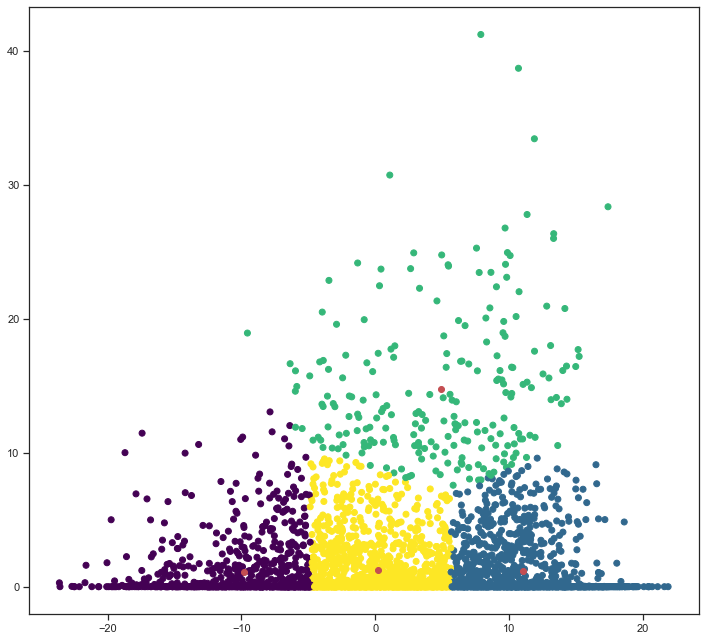

In [40]:
plt.scatter(df_P1['TempMean'],df_P1['PrecMean'],c = kmeans.labels_,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = 'o', c = 'r')
plt.axis('scaled')
plt.show()

SAMPLE YEAR (1970)

In [42]:
y_1970 = Y_clean['1970-01-01':'1970-12-31']
X_pca_1970=df_pca_2['1970-01-01':'1970-12-31']
X_mean_1970=X_mean['1970-01-01':'1970-12-31']

df_1970=y_1970
df_1970=df_1970.merge(X_pca_1970,left_index=True,right_index=True)
df_1970=df_1970.merge(X_mean_1970,left_index=True,right_index=True)
df_1970

Flow        PC1       PC2   TempMean  PrecMean
Dates                                                         
1970-01-01  0.001000  24.531308 -4.601560  -6.100000  0.000000
1970-01-02  0.001000  29.453487 -4.162024  -7.766667  0.000000
1970-01-03  0.000608  41.955463 -3.109031 -11.955555  0.000000
1970-01-04  1.265150  45.296702 -2.692373 -13.066667  0.055556
1970-01-05  0.512353  55.358132 -2.012255 -16.422223  0.000000
...              ...        ...       ...        ...       ...
1970-12-27  0.198849  31.884840 -3.962590  -8.577778  0.000000
1970-12-28  1.620981  27.749331 -4.271178  -7.200000  0.011111
1970-12-29  2.332696  26.352304 -3.783150  -6.777778  0.211111
1970-12-30  1.220664  42.233151 -3.073710 -12.055556  0.000000
1970-12-31  0.839283  43.338602 -3.004628 -12.411111  0.000000

[365 rows x 5 columns]

In [43]:
week_1970 = df_1970.groupby(pd.Grouper(freq='W')).mean()
week_mean_1970 = X_mean_1970.groupby(pd.Grouper(freq='W')).mean()
week_1970.shape

(53, 5)

In [44]:
k=4
kmeans = KMeans(n_clusters=k).fit(df_1970[['TempMean','PrecMean']])

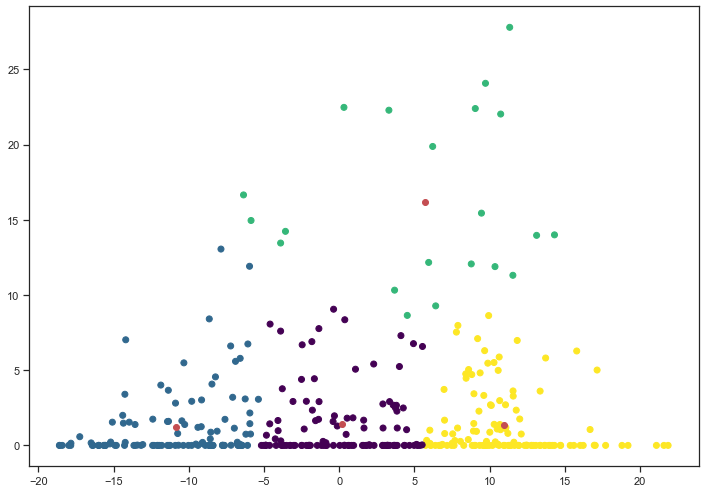

In [45]:
plt.scatter(df_1970['TempMean'],df_1970['PrecMean'],c = kmeans.labels_,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = 'o', c = 'r')
plt.axis('scaled')
plt.show()

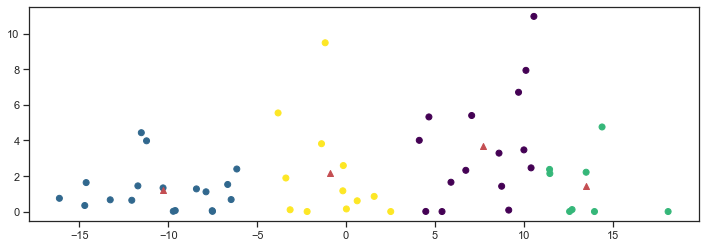

In [46]:
kmeans = KMeans(n_clusters=k).fit(week_1970[['TempMean','PrecMean']])
plt.scatter(week_1970['TempMean'],week_1970['PrecMean'],c = kmeans.labels_,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.axis('scaled')
plt.show()

## Simplicial Complexes


In [47]:
import networkx as nx
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

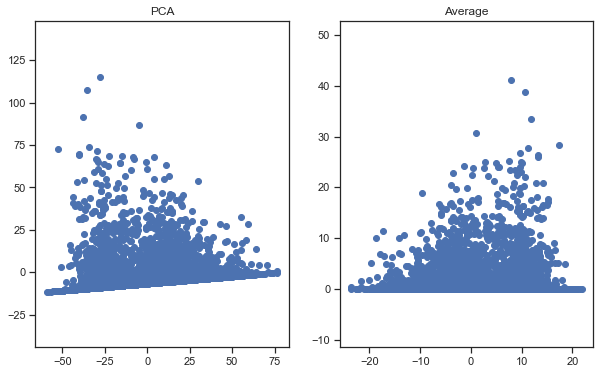

In [48]:
plt.figure(figsize = (10,6))
plt.subplot(1, 2,1) # row 1, col 2 index 1
plt.plot(df_P1['PC1'],df_P1['PC2'],'o')
plt.title("PCA")
plt.axis('equal')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(df_P1['TempMean'],df_P1['PrecMean'],'o')
plt.title("Average")
plt.axis('equal')
plt.show()

1.1 Simplicial Complex PCA

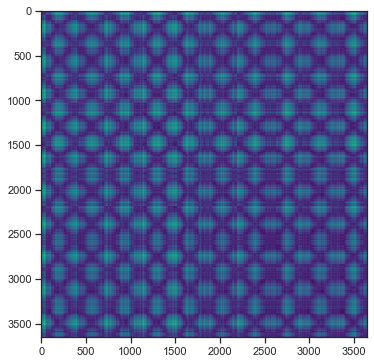

In [49]:
sns.set_palette(sns.color_palette("viridis"))
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X_pca_2_P1)
plt.figure(figsize = (6,6))
plt.imshow(D,cmap='viridis')
plt.show()

In [50]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

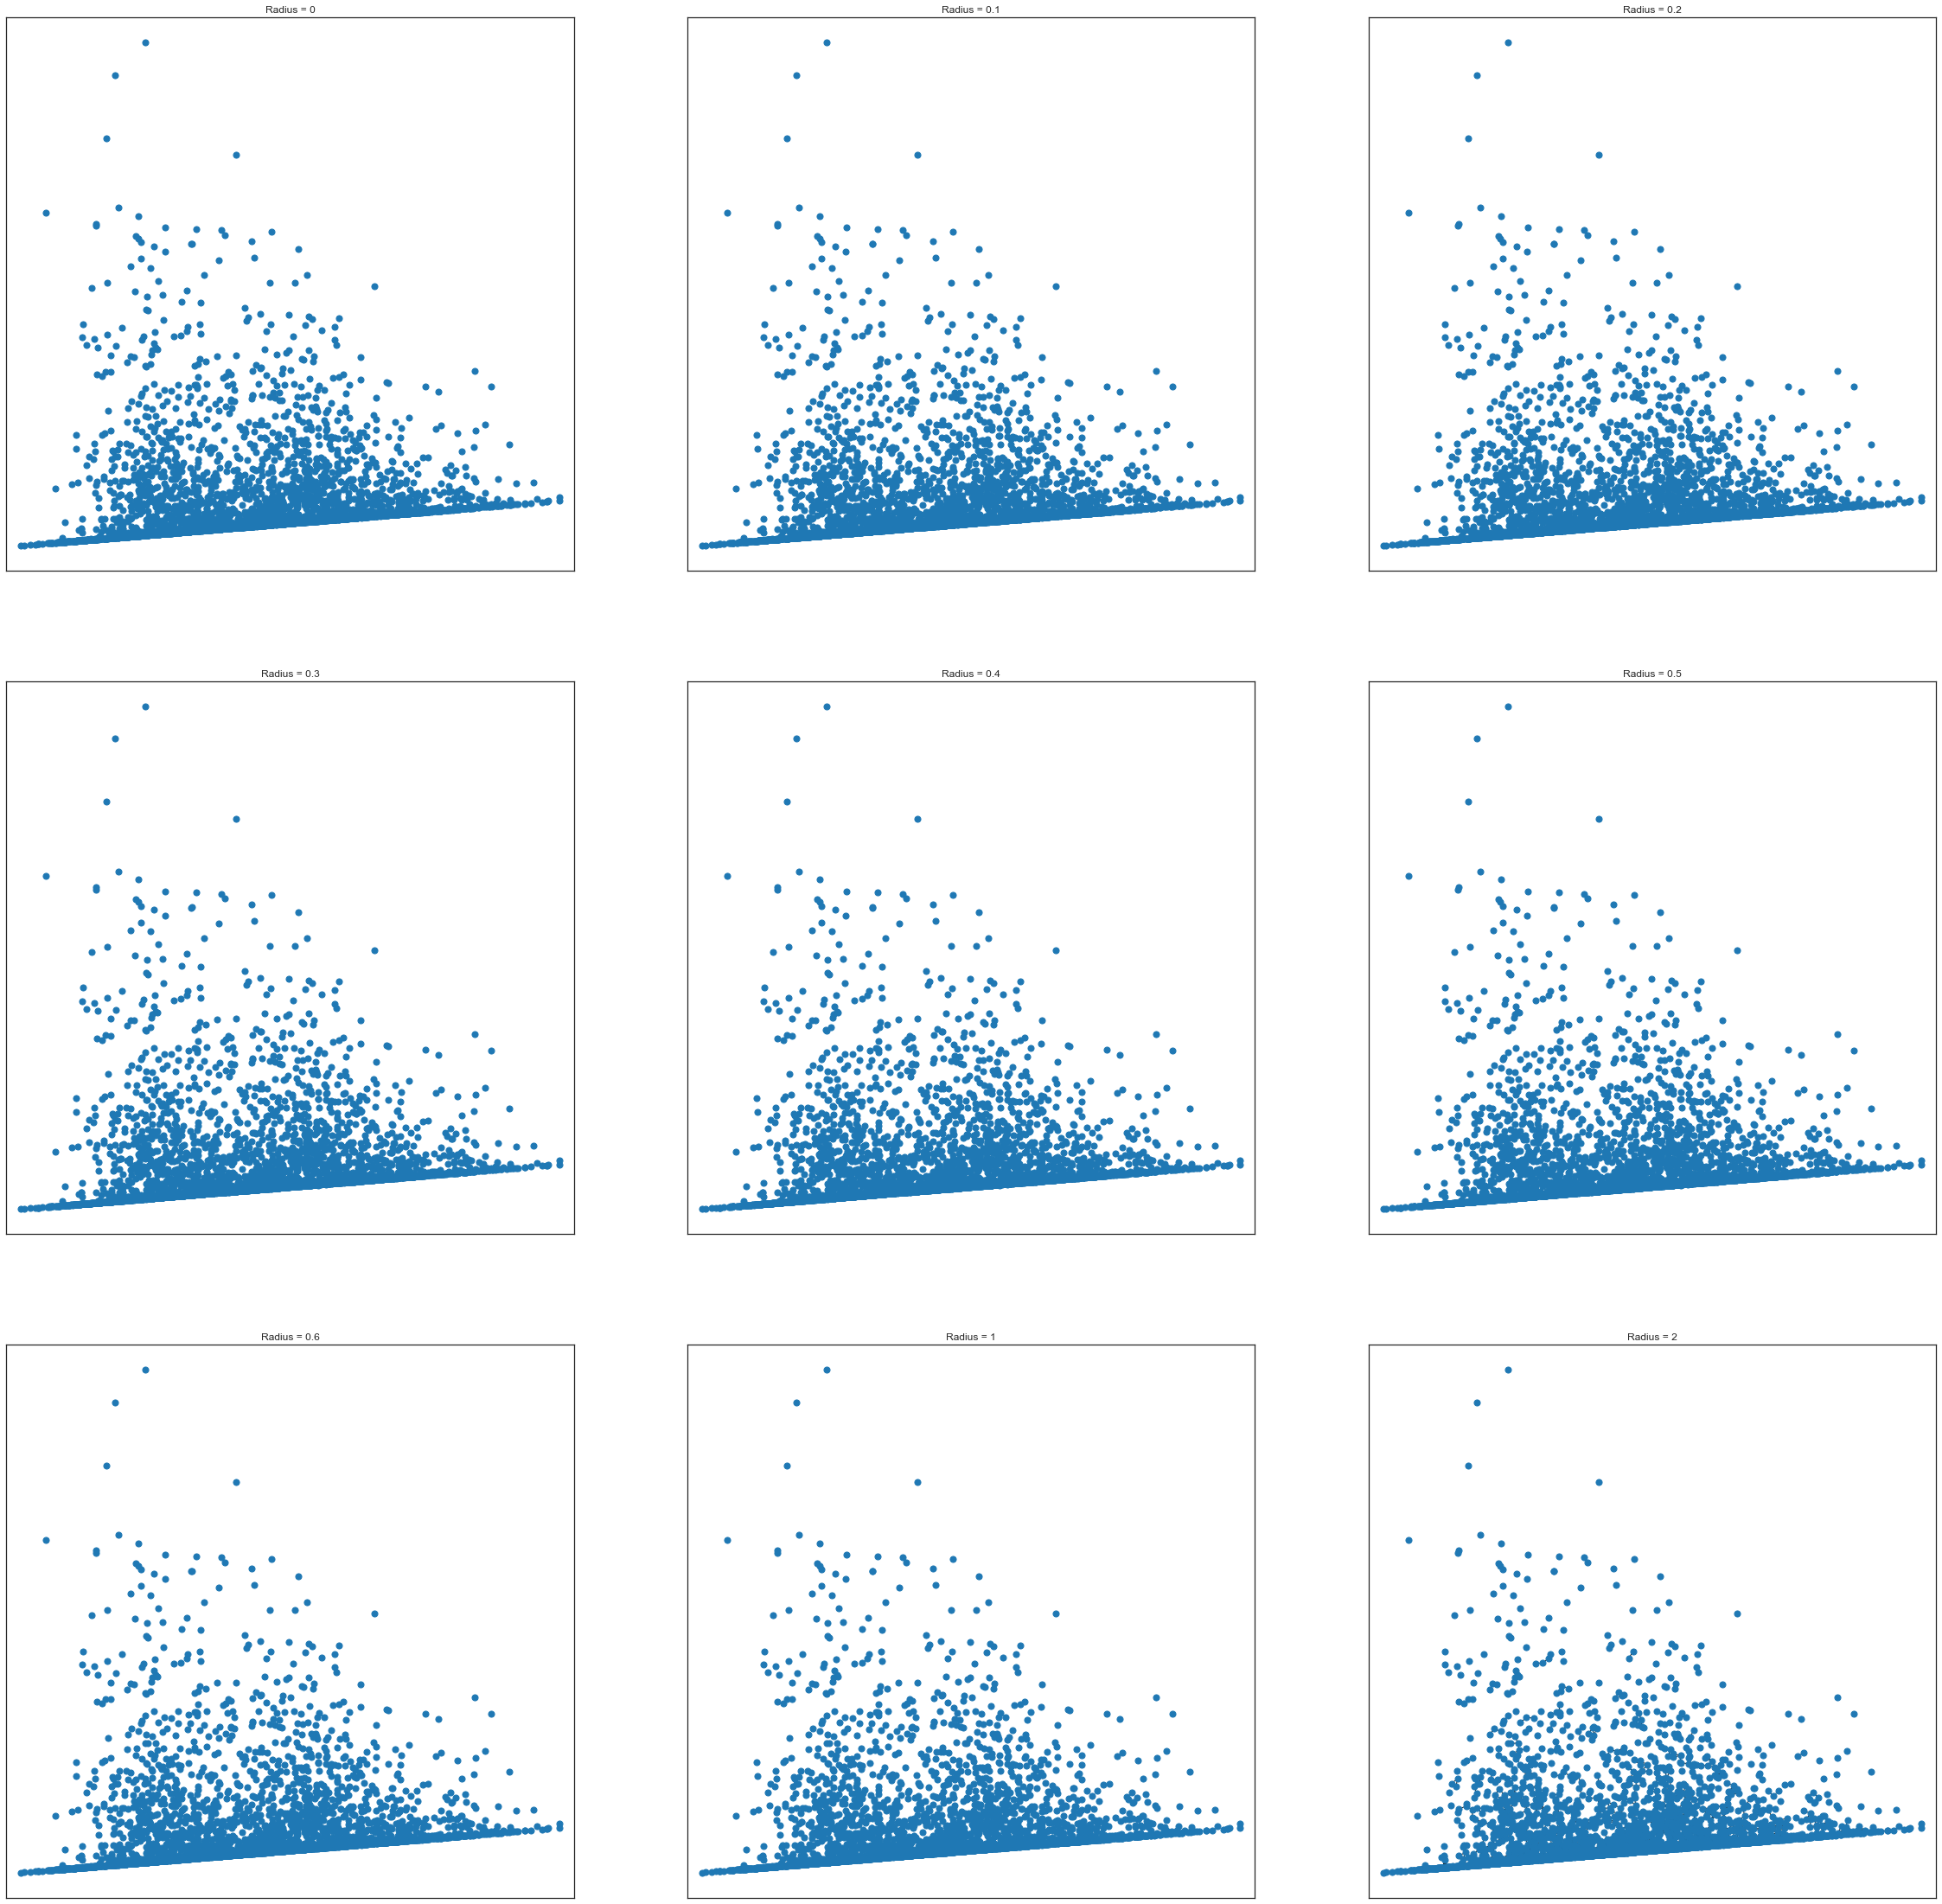

In [51]:
r = 1
rs = [0,0.1,0.2,0.3,0.4,0.5,0.6,1,2]
G = create_simplicial_complex(D,r)

pos = {n:X_pca_2_P1.iloc[n,:] for n in range(len(X_pca_2_P1))}

plt.figure(figsize = (40,40))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

1.2 Simplicial Complex Average

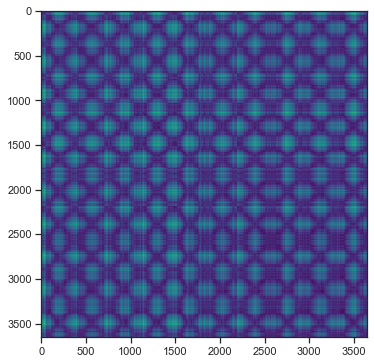

In [52]:
D = pairwise_distances(X_mean_P1)
plt.figure(figsize = (6,6))
plt.imshow(D, cmap='viridis')
plt.show()

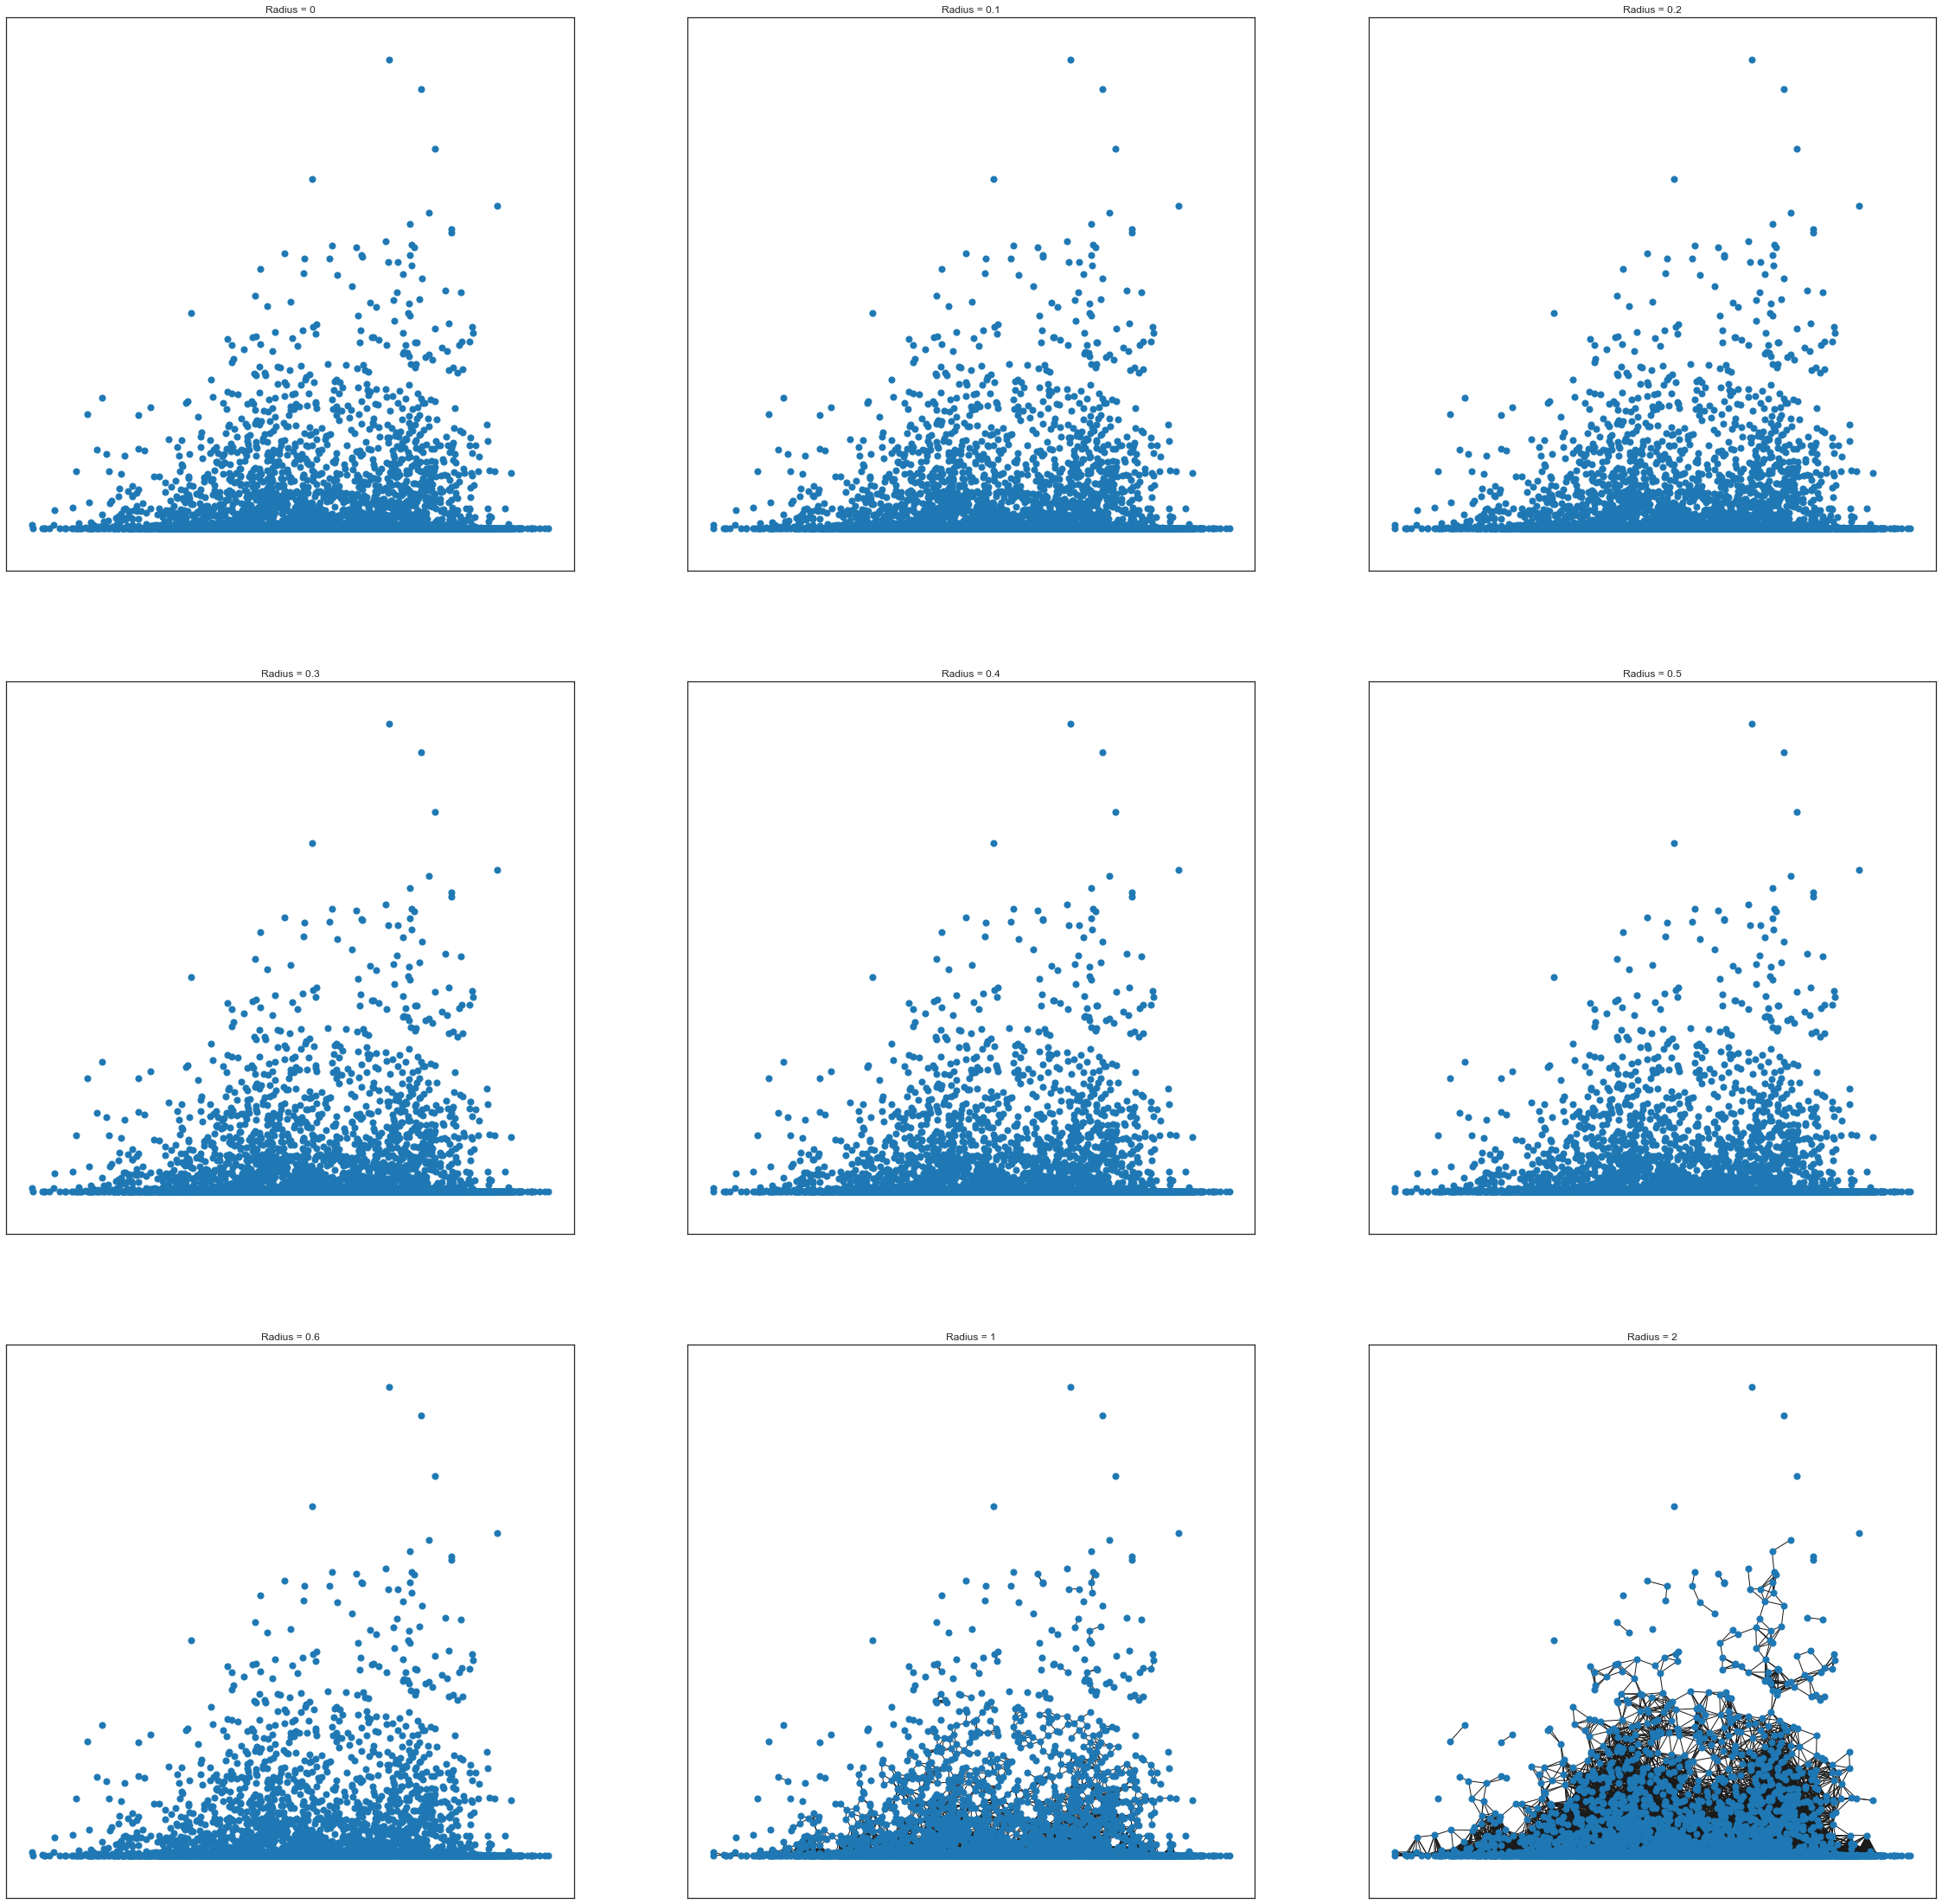

In [53]:
r = 1
G = create_simplicial_complex(D,r)

pos = {n:X_mean_P1.iloc[n,:] for n in range(len(X_mean_P1))}

plt.figure(figsize = (40,40))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

1.3 Simplicial Complex by year

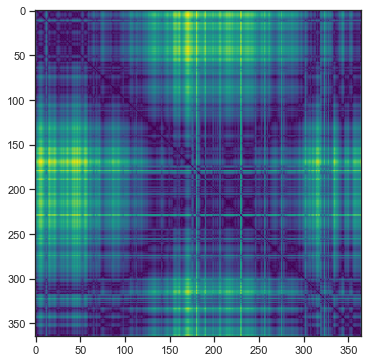

In [54]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X_mean_1970)
plt.figure(figsize = (6,6))
plt.imshow(D,cmap='viridis')
plt.show()

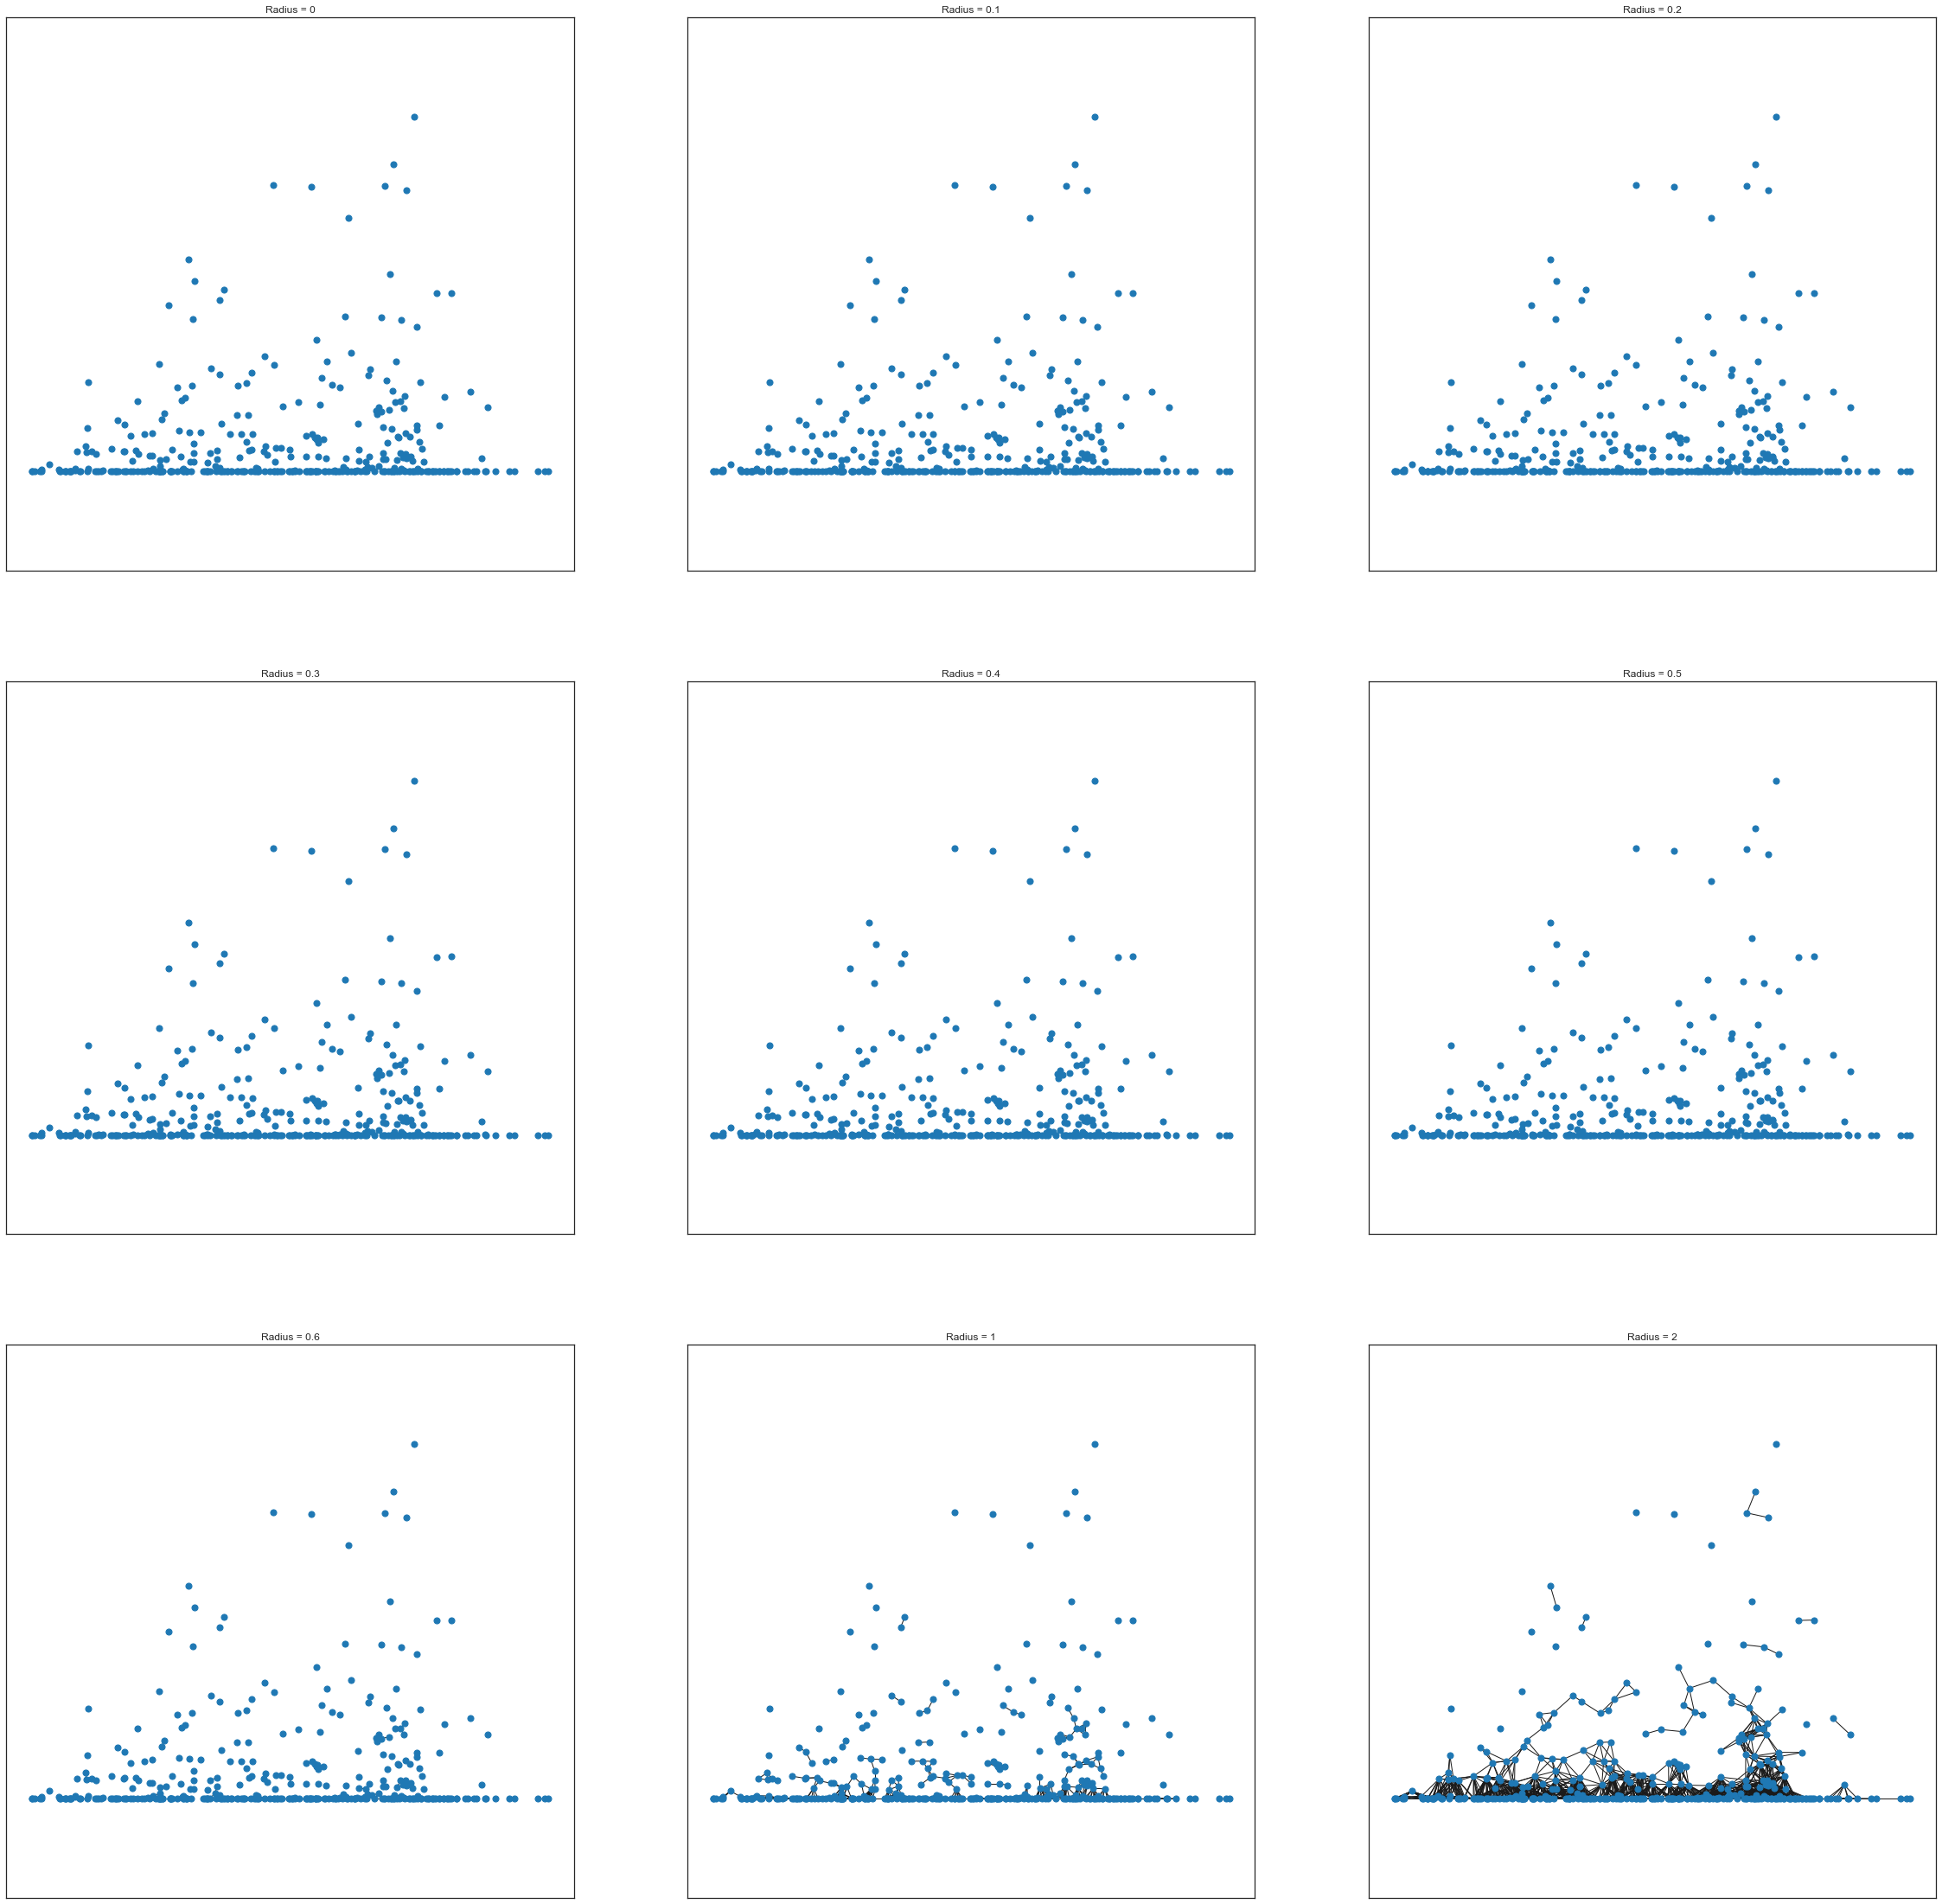

In [55]:
r = 1
G = create_simplicial_complex(D,r)
rs = [0,0.1,0.2,0.3,0.4,0.5,0.6,1,2]
pos = {n:X_mean_1970.iloc[n,:] for n in range(len(X_mean_1970))}

plt.figure(figsize = (40,40))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

1.3 Simplicial Complex by Week

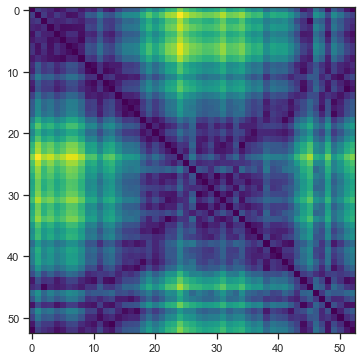

In [56]:
D = pairwise_distances(week_mean_1970)
plt.figure(figsize = (6,6))
plt.imshow(D, cmap='viridis')
plt.show()

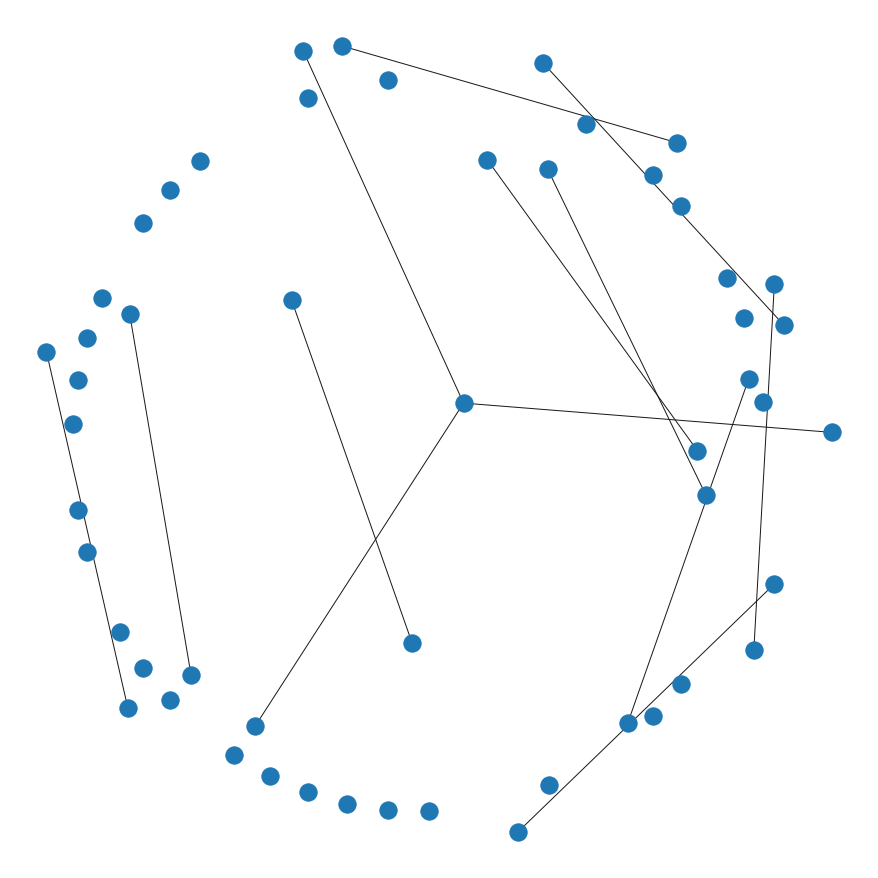

In [57]:
r = 1
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)

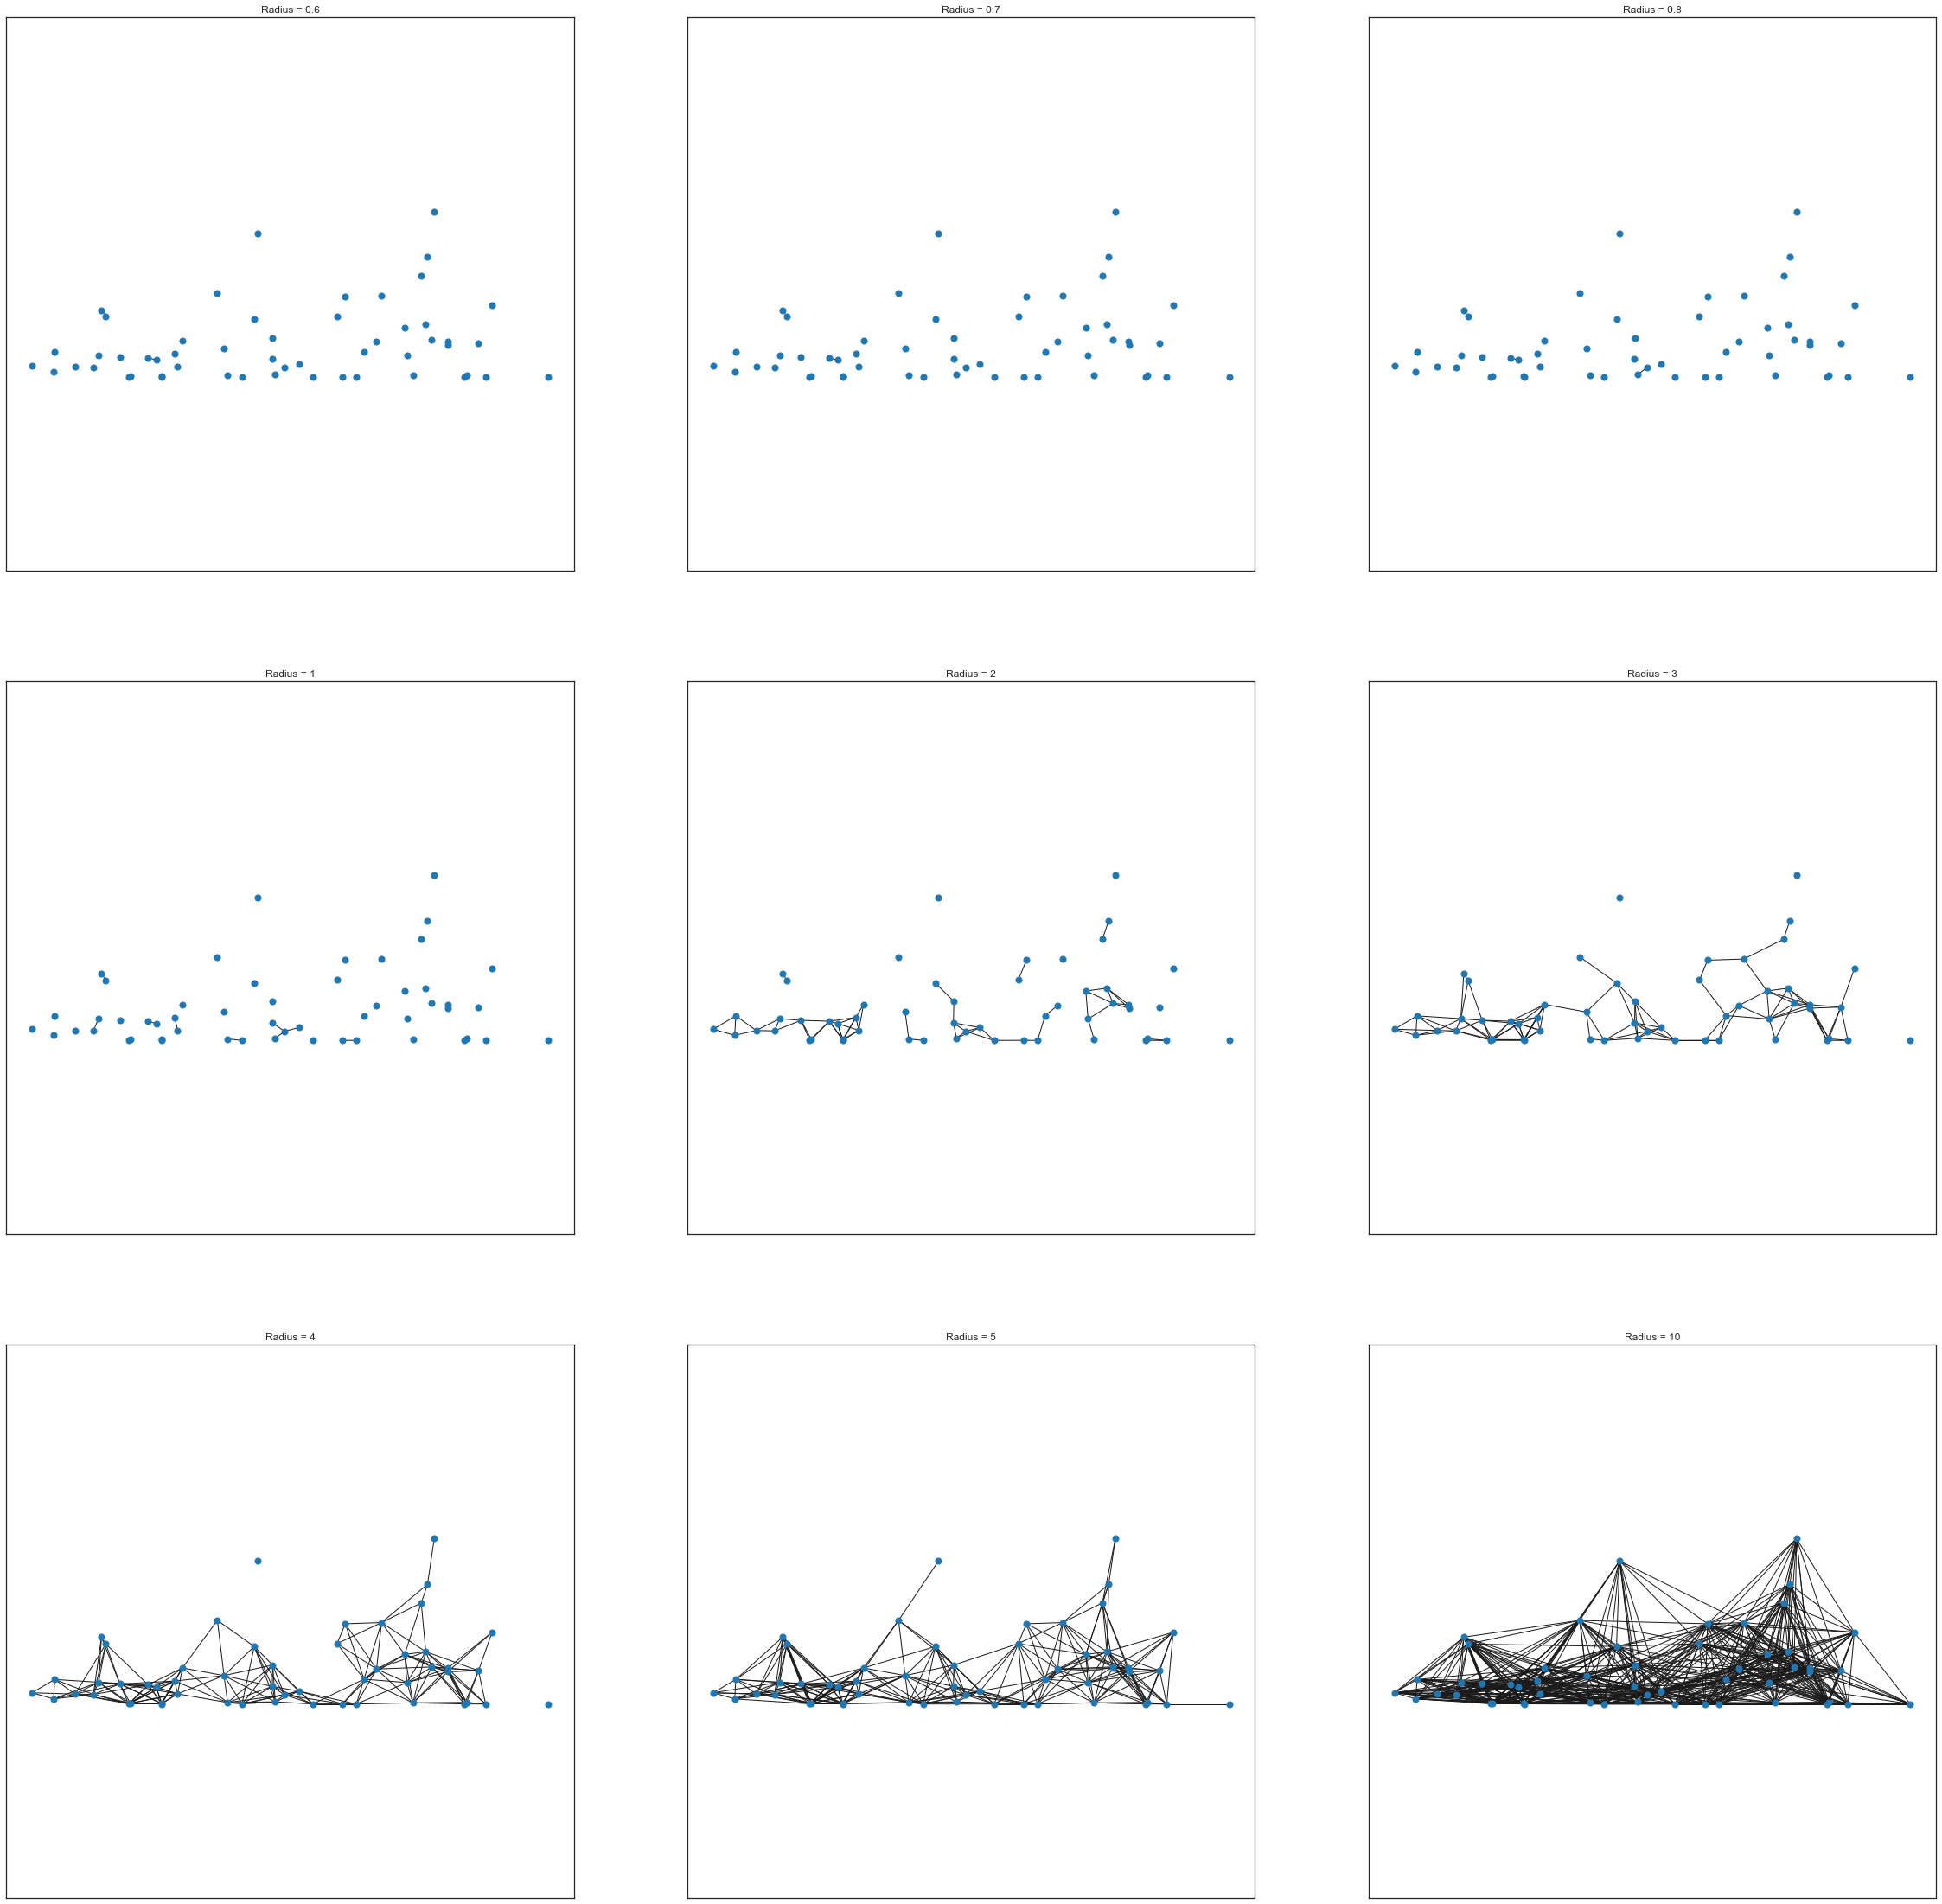

In [58]:
r = 1
rs = [0.6,0.7,0.8,1,2,3,4,5,10]
G = create_simplicial_complex(D,r)

pos = {n:week_mean_1970.iloc[n,:] for n in range(len(week_mean_1970))}

plt.figure(figsize = (40,40))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))
plt.show()

## 3. Persistent Homology

In [59]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [60]:
r = 2
#D = pairwise_distances(week_mean_2000)
G, two_spx_list = create_2_dim_simplicial_complex(D,r)

In [61]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

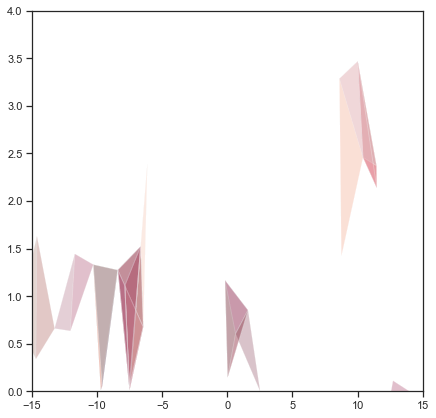

In [62]:
fig, ax = plt.subplots(figsize = (7,7))

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-15, 15])
plt.ylim([0, 4])
plt.show()



## 4. Persistent Diagrams

In [63]:
!pip install gudhi

In [64]:
import gudhi as gd

In [65]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

usetex mode requires TeX.


Dimension 0


<Figure size 864x864 with 0 Axes>

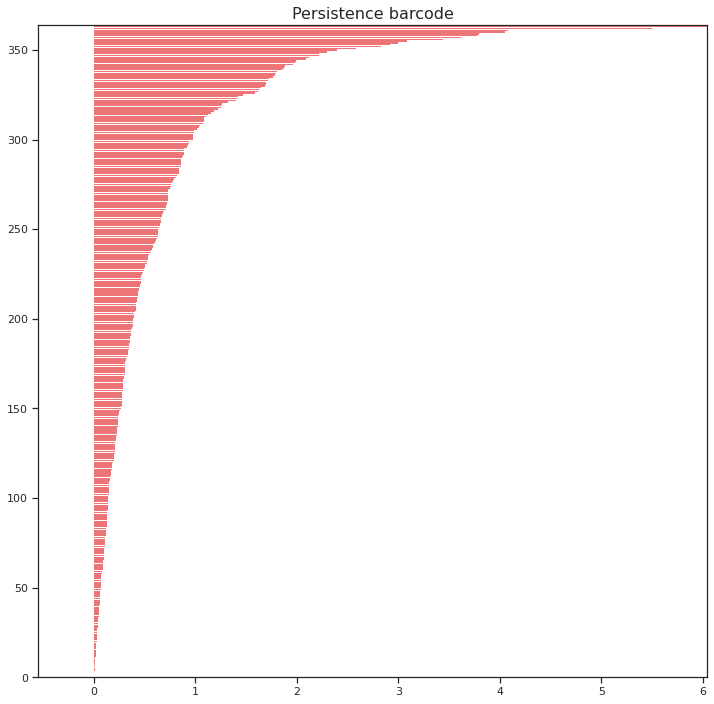

Dimension 1


<Figure size 864x864 with 0 Axes>

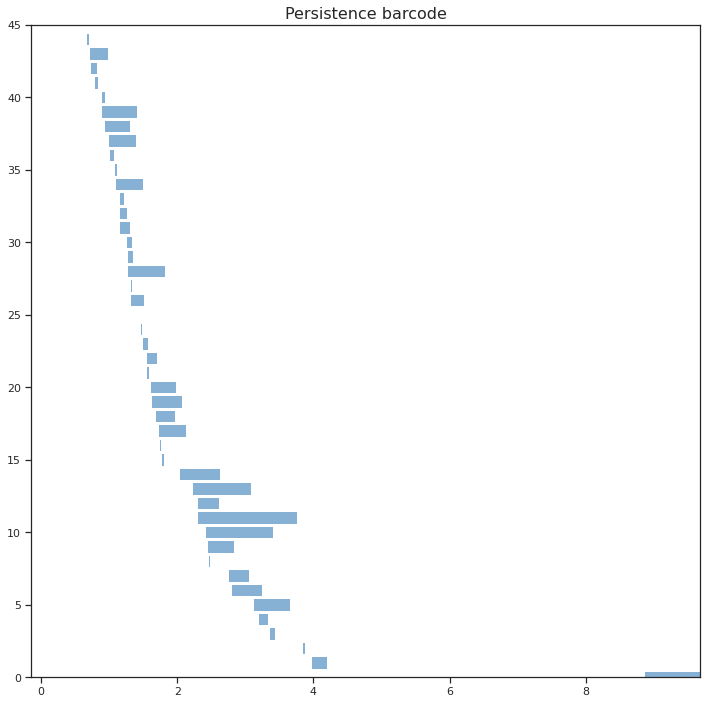

In [66]:
visualize_persistent_homology(X_mean_1970)

Dimension 0


<Figure size 864x864 with 0 Axes>

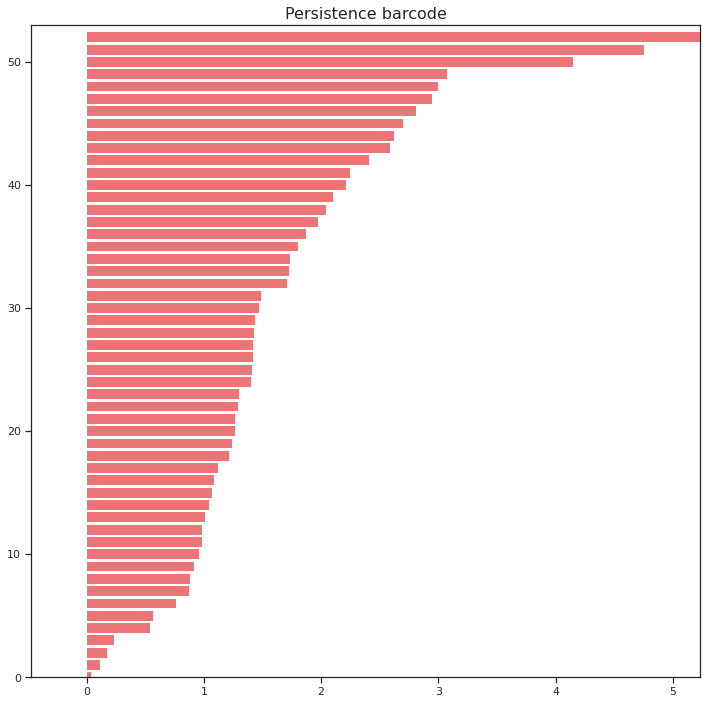

Dimension 1


<Figure size 864x864 with 0 Axes>

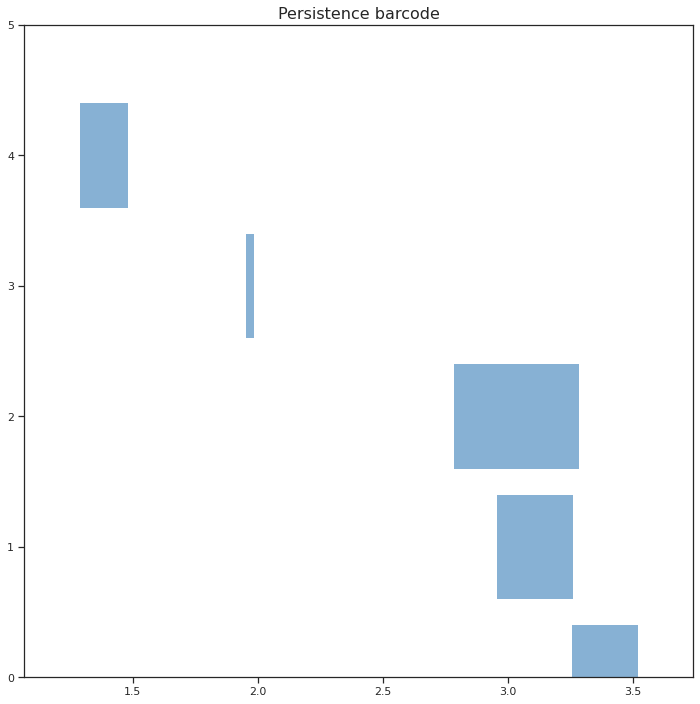

In [67]:
visualize_persistent_homology(week_mean_1970)

## 5. Persistent Barcodes

<Figure size 864x864 with 0 Axes>

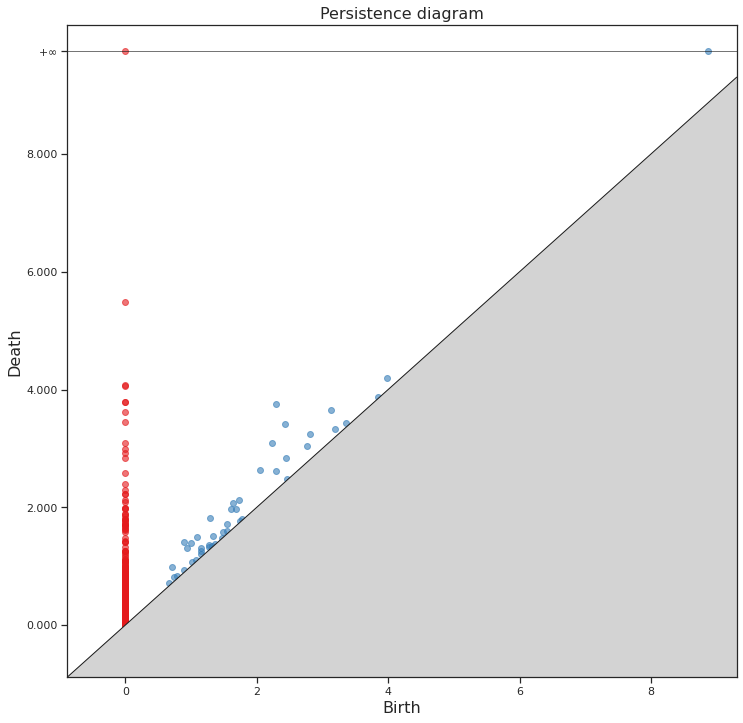

In [68]:
visualize_persistent_homology(X_mean_1970, style = 'diagrams')

<Figure size 864x864 with 0 Axes>

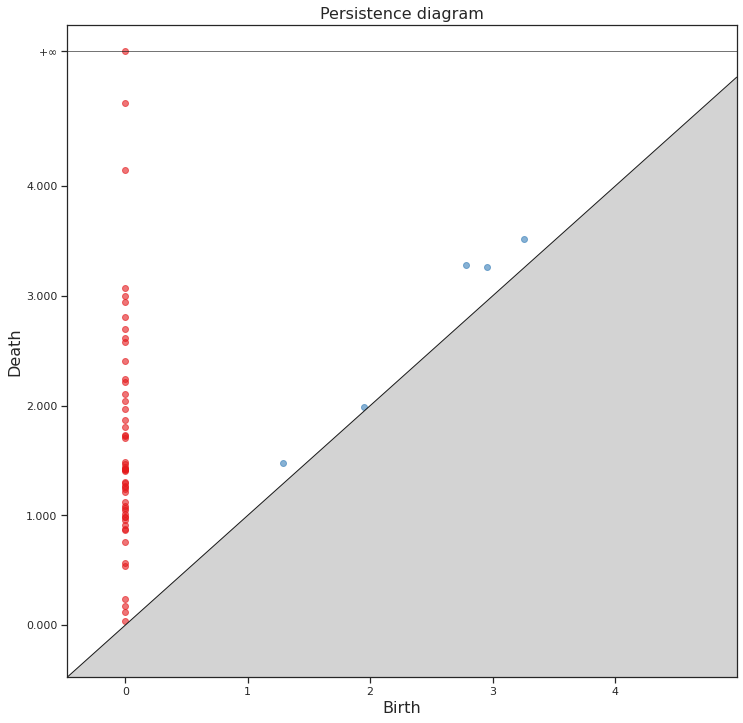

In [69]:
visualize_persistent_homology(week_mean_1970, style = 'diagrams')

## 6. Time series signal to point cloud

In [70]:
import plotly.graph_objects as go

In [71]:
fig = go.Figure(data=go.Scatter(x=X_mean_P1.index.values, y=Y_P1['Flow'], name='Flow'))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [72]:
fig = go.Figure(data=go.Scatter(x=X_mean_P1.index.values, y=X_mean_P1['TempMean'], name = 'Temperature', marker=dict(color="red")))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [73]:
fig = go.Figure(data=go.Scatter(x=X_mean_P1.index.values, y=X_mean_P1['PrecMean'], name = 'Temperature', marker=dict(color="green")))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [76]:
fig = go.Figure(data=go.Scatter(x=X_mean_P1.index.values, y=Y_P1['Flow'], name='Flow'))
fig.add_scatter(x=X_mean_P1.index.values, y=X_mean_P1['TempMean'], name = 'Temperature')
fig.add_scatter(x=X_mean_P1.index.values, y=X_mean_P1['PrecMean'], name = 'Precipitation')
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [77]:
!pip install time_series

In [78]:
!pip install giotto-tda

In [79]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_periodic = 7
embedding_time_delay_periodic = 1
stride = 40

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(Y_P1['Flow'])
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (92, 4)


In [80]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [81]:
y_periodic_embedded = fit_embedder(embedder_periodic, Y_P1['Flow'])

Shape of embedded time series: (92, 4)
Optimal embedding dimension is 4 and time delay is 1


In [82]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(y_periodic_embedded)